In [4]:
# Import the library to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# Import important Python libraries required for analysis and model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt


In [8]:
# Reading the input dataset for the first time

bike_data = pd.read_csv('C:/Users/Manee/OneDrive/Desktop/OnlyONE/Maneesh/UpGRAD/BikeSharingAssignment/day.csv')

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike_data.shape

(730, 16)

In [10]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


With above result we can see that difference  between mean and median is not much for any of the fields provided; so we can say that we don't have any outliers. 


# Now we Will start with the next step of visualizing the data
1. Visualzing the Numeric variable fields

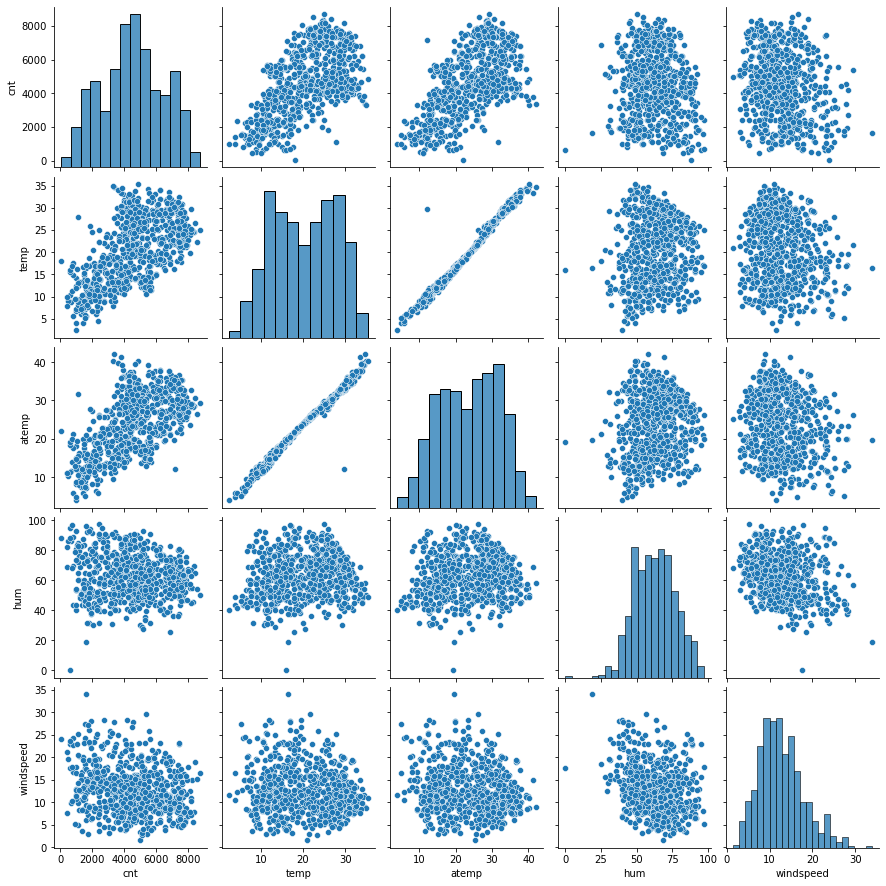

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing numeric variables
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

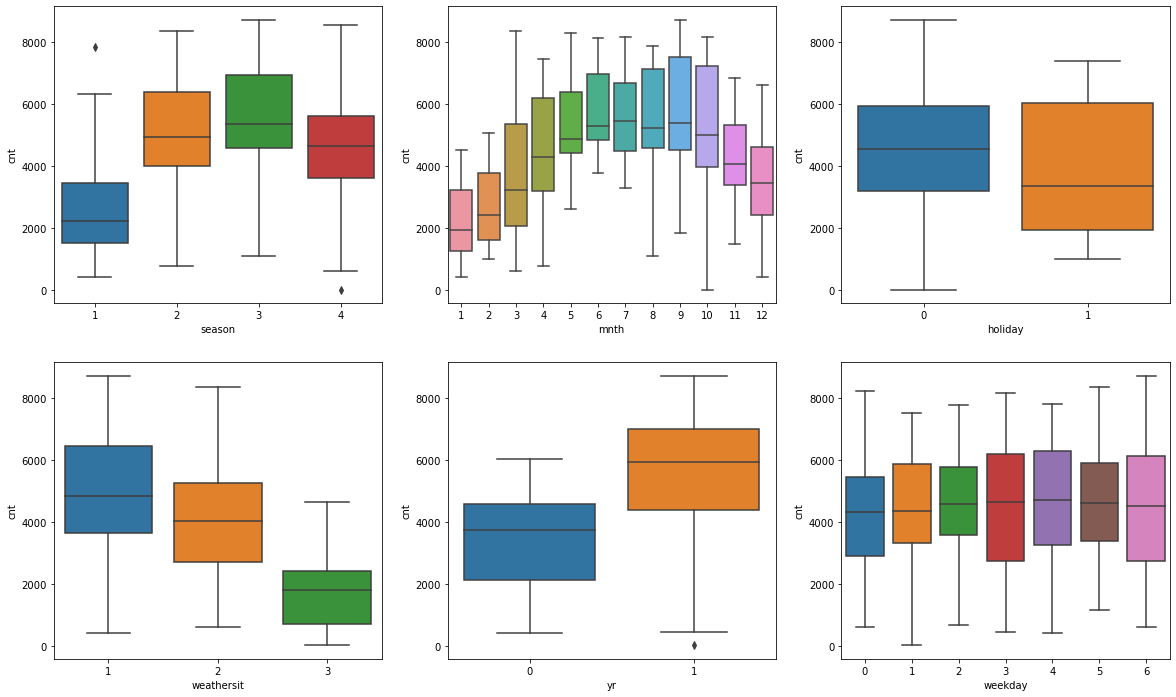

In [13]:
# 2. After visualizing numeric variables, we will visualize categoric variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

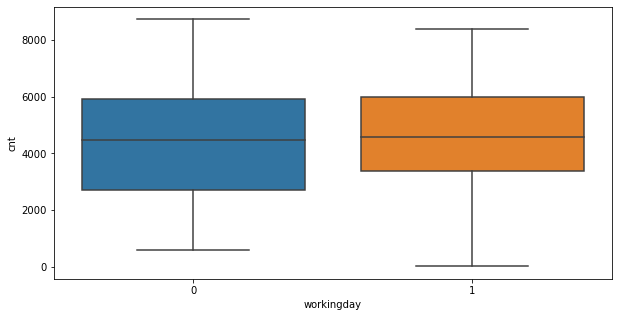

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

With above graphs we can come up with following inferences - 
1. Number of Bike sharing has increased in 2019.
2. Count of total rental(cnt) bikes including both casual and registered had zero values during weather situations like - Heavy rains, + Ice Pallets, + Thunderstorms, + Mist, and Fog. 
3. Total count of rental bikes including both casual and registered had increased during summers.
4. Total count of rental bikes including both casual and registered was less during Holidays.
5. Count of total rental bikes including both casual and registered is during spring season.
6. count of total bike rentals is higher when weather is clear for example - Clear, Few clouds, Partly cloudy, Partly cloudy.

## Now we will move ahead with step # 3
### Drop the columns which are not important from building the model perspective


In [ ]:
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

In [25]:
### Converting some numeric values to categorical data
## Mapping mnth column with calendar month numeric variable.

In [ ]:
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [35]:
## maping seasons column from the dataset
bike_data.season = bike_data.season.map({1: "Spring",2:"Summer",3:"Fall",4:"Winter"})

In [23]:
## mapping weathersit field
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [31]:
# mapping of weekdays
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [37]:
# check the dataframe now after all above steps of dropping the irrelevant columns and mapping of the important columns to numeric values

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,NaN,0,Jan,0,Saturday,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,Jan,0,Sunday,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,Jan,0,Monday,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,Jan,0,Tuesday,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,Jan,0,Wednesday,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


# Creation of Dummy Variables

In [38]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [39]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [40]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [41]:
# Now let's see the head of our dataframe.
bike_data.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Saturday,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sunday,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Monday,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tuesday,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wednesday,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [43]:
bike_data.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
bike_data.shape

(730, 25)

### Now we will move ahead with next step(STEP ## 4) of splitting the dataset into training and test datasets.

In [45]:
train, test = train_test_split(bike_data, train_size = 0.8, test_size = 0.2, random_state = 100)

## Rescaling feature i.e STEP ## 5

In [47]:
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [49]:
train.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
367,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717
648,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385
44,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556
705,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631
379,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346


In [50]:
train.describe()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,...,0.133562,0.154110,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,...,0.340472,0.361363,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


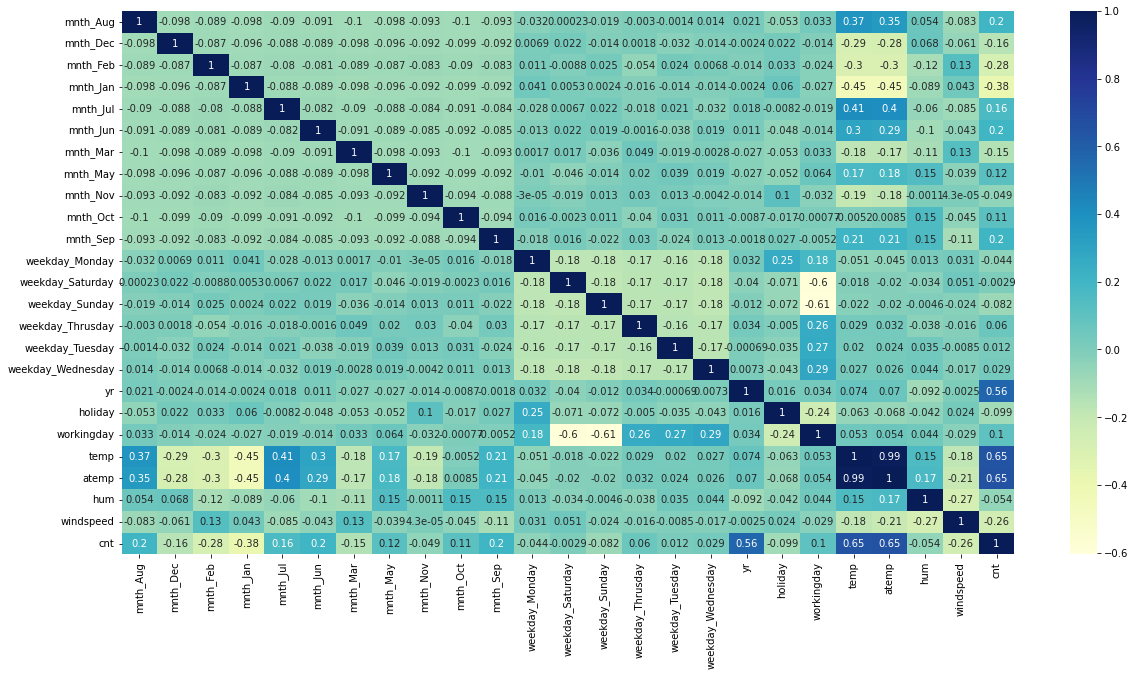

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Lets first build the model using all columns

## Divide into X & Y sets 

In [ ]:
y_train = train.pop('cnt')
X_train = train

    ## Build a Linear model
#### Fit a regression line through the training data using statsmodels. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [56]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [58]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mnth_Aug', False, 11),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 4),
 ('weekday_Thrusday', False, 10),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Starting with all the models

First Model

In [59]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Jun', 'mnth_Mar', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday'],
      dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
# Check the parameters obtained

lm.params

const        0.399611
mnth_Feb    -0.083122
mnth_Jan    -0.099426
mnth_Jul    -0.072978
mnth_May     0.047939
mnth_Nov     0.055896
mnth_Oct     0.098334
mnth_Sep     0.083603
yr           0.228770
holiday     -0.098108
temp         0.317122
atemp        0.239961
hum         -0.339013
windspeed   -0.238629
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          5.21e-190
Time:                        06:43:20   Log-Likelihood:                 513.51
No. Observations:                 584   AIC:                            -999.0
Df Residuals:                     570   BIC:                            -937.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3996      0.029     13.636      0.0

## Checking VIF for multicolinearity

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,temp,70.57
21,atemp,60.80
19,workingday,51.88
13,weekday_Sunday,11.66
12,weekday_Saturday,11.62
18,holiday,3.29
0,mnth_Aug,3.13
4,mnth_Jul,3.10
3,mnth_Jan,2.86
5,mnth_Jun,2.60


Final Model

In [74]:
### dropping hum from the model
X_train = X_train.drop(['hum'], axis=1)

In [76]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [77]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     86.95
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.36e-164
Time:                        06:48:28   Log-Likelihood:                 475.37
No. Observations:                 584   AIC:                            -904.7
Df Residuals:                     561   BIC:                            -804.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1866      0.02

In [80]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,temp,70.50
21,atemp,60.77
19,workingday,39.69
12,weekday_Saturday,8.86
13,weekday_Sunday,8.76
0,mnth_Aug,3.13
4,mnth_Jul,3.07
18,holiday,2.87
3,mnth_Jan,2.84
5,mnth_Jun,2.57


### Residual Analysis of the training data

In [84]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

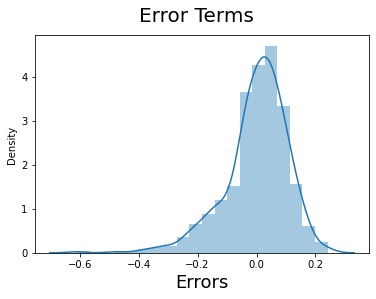

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Predictions using the final model

In [88]:
## Applying the scaling on the test sets
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [89]:
test.describe()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02
mean,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,...,0.178082,0.089041,0.445205,0.034247,0.746575,-0.075392,-0.106140,0.000068,-0.093539,-2.531347e-03
std,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,...,0.383899,0.285783,0.498699,0.182488,0.436469,0.000220,0.000153,0.000017,0.000166,2.816075e-09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.075876,-0.106496,0.000028,-0.093908,-2.531354e-03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,-0.075587,-0.106275,0.000057,-0.093662,-2.531349e-03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-0.075401,-0.106139,0.000065,-0.093548,-2.531348e-03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,-0.075178,-0.106002,0.000078,-0.093440,-2.531346e-03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-0.075009,-0.105838,0.000106,-0.093039,-2.531341e-03


### Divide into X-Test and Y-Test

In [90]:
y_test = test.pop('cnt')
X_test = test

In [91]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [92]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              146 non-null    float64
 1   mnth_Aug           146 non-null    uint8  
 2   mnth_Dec           146 non-null    uint8  
 3   mnth_Feb           146 non-null    uint8  
 4   mnth_Jan           146 non-null    uint8  
 5   mnth_Jul           146 non-null    uint8  
 6   mnth_Jun           146 non-null    uint8  
 7   mnth_Mar           146 non-null    uint8  
 8   mnth_May           146 non-null    uint8  
 9   mnth_Nov           146 non-null    uint8  
 10  mnth_Oct           146 non-null    uint8  
 11  mnth_Sep           146 non-null    uint8  
 12  weekday_Monday     146 non-null    uint8  
 13  weekday_Saturday   146 non-null    uint8  
 14  weekday_Sunday     146 non-null    uint8  
 15  weekday_Thrusday   146 non-null    uint8  
 16  weekday_Tuesday    146 n

In [93]:
## Making predictions using the test model
y_pred = lm.predict(X_test)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.3879439871703456e+16

In [95]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.10931397000023398

In [ ]:
# Model Evaluation

Text(0, 0.5, 'y_pred')

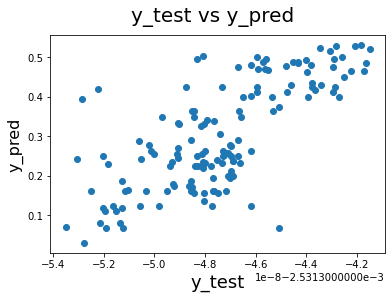

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [98]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,24))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
21,temp,0.247178
18,yr,0.238836
22,atemp,0.205760
0,const,0.186592
20,workingday,0.085665
13,weekday_Saturday,0.078736
10,mnth_Oct,0.041962
11,mnth_Sep,0.039413
14,weekday_Sunday,0.022929


All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
Temp is the most significant with the largest coefficient.
Followed by weathersit_Light Snow & Rain.
Bike rentals is more for the month of september
The rentals reduce during holidays
This indicates that the bike rentals is majorly affected by temperature,season and month.